In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = pd.read_csv('falling_data_acc_train_inputs.csv')
y_train = pd.read_csv('falling_data_acc_train_targets.csv')
x_test = pd.read_csv('falling_data_acc_testing_inputs.csv')
y_test = pd.read_csv('falling_data_acc_testing_targets.csv')


x_train = x_train.drop('sensor_signal', axis = 1)
x_test = x_test.drop('sensor_signal', axis = 1)

In [4]:
x_train = x_train.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)
x_test = x_test.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'Aver_25_x'}>,
        <AxesSubplot:title={'center':'Aver_25_y'}>,
        <AxesSubplot:title={'center':'Aver_25_z'}>,
        <AxesSubplot:title={'center':'Aver_75_x'}>,
        <AxesSubplot:title={'center':'Aver_75_y'}>],
       [<AxesSubplot:title={'center':'Aver_75_z'}>,
        <AxesSubplot:title={'center':'n_peak_x'}>,
        <AxesSubplot:title={'center':'n_peak_y'}>,
        <AxesSubplot:title={'center':'n_peak_z'}>,
        <AxesSubplot:title={'center':'P_peak_x'}>],
       [<AxesSubplot:title={'center':'P_peak_y'}>,
        <AxesSubplot:title={'center':'P_peak_z'}>,
        <AxesSubplot:title={'center':'std_x'}>,
        <AxesSubplot:title={'center':'std_y'}>,
        <AxesSubplot:title={'center':'std_z'}>],
       [<AxesSubplot:title={'center':'mean_x'}>,
        <AxesSubplot:title={'center':'mean_y'}>,
        <AxesSubplot:title={'center':'mean_z'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'weig

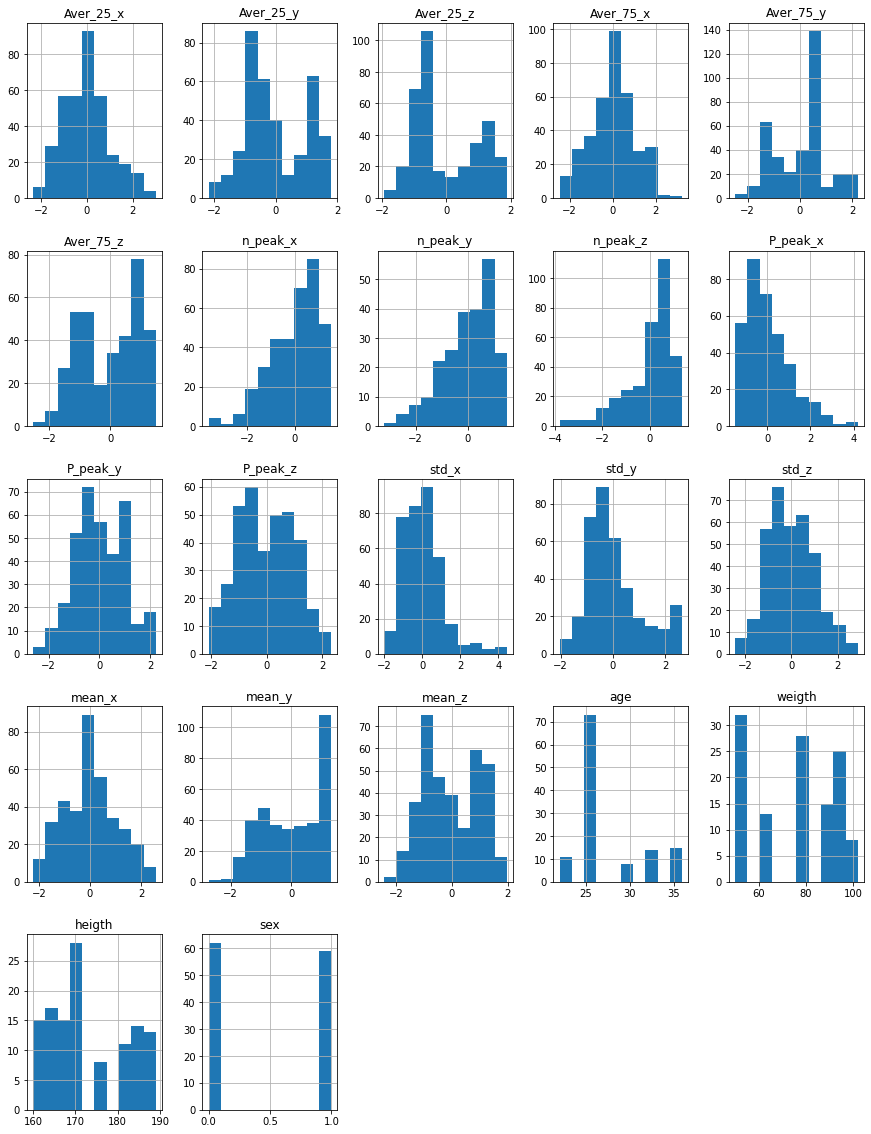

In [5]:
### examine the distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
x_train.hist(ax = ax)

In [6]:
x_train = pd.DataFrame(x_train)
x_train = x_train.fillna(0)
x_train = np.array(x_train)

y_train = pd.DataFrame(y_train)
y_train = y_train.fillna(0)
y_train = np.array(y_train)

x_test = pd.DataFrame(x_test)
x_test = x_test.fillna(0)
x_test = np.array(x_test)

y_test = pd.DataFrame(y_test)
y_test = y_test.fillna(0)
y_test = np.array(y_test)

y_train = np.reshape(y_train, [y_train.shape[0],])
y_test = np.reshape(y_test, [y_test.shape[0],])

# Train model

In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [8]:
#### Gridsearch

In [9]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[3,4,5],
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [2,3,4,5]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [2,3,4,5], 
    'n_estimators': [ 100, 200, 300]
}





In [10]:
SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
SVC_grid_search.fit(x_train, y_train)
SVC_grid_search.best_params_

{'C': 1, 'degree': 4, 'kernel': 'poly'}

In [11]:
DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
DT_grid_search.fit(x_train, y_train)
DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3}

In [12]:
Log_grid_search = GridSearchCV(Log_reg, param_grid = Log_para, cv = 10, return_train_score = True)
Log_grid_search.fit(x_train, y_train)
Log_grid_search.best_params_

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sk

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

In [13]:
RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
RF_grid_search.fit(x_train, y_train)
RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 300}

# Evaluation
* performance metrix
* accuracy, sensitivity and specificity
* ROC curve

In [14]:
SVC_best_reg = SVC_grid_search.best_estimator_
DT_best_reg = DT_grid_search.best_estimator_
Log_best_reg = Log_grid_search.best_estimator_
RF_best_reg = RF_grid_search.best_estimator_

In [15]:
SVC_prediction = SVC_best_reg.predict(x_test)
DT_prediction = DT_best_reg.predict(x_test)
Log_prediction = Log_best_reg.predict(x_test)
RF_prediction = RF_best_reg.predict(x_test)

In [28]:
def replace(target_list):
    replaced_list = []
    for i in target_list:
        if i == 1:
            replaced_list.append("faller")
        else:
            replaced_list.append("non faller")
    return replaced_list

In [29]:
y_replaced_test = replace(y_test)
SVC_prediction_replaced = replace(SVC_prediction)
DT_prediction_replaced = replace(DT_prediction)
Log_prediction_replaced = replace(Log_prediction)
RF_prediction_replaced = replace(RF_prediction)

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(0.5, 1.0, 'SVC_model confusion matrix')

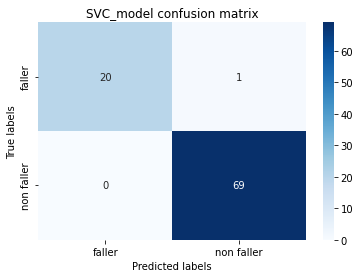

In [40]:
labels = ["faller", "non faller"]
SVC_cm = (confusion_matrix(y_replaced_test, SVC_prediction_replaced, labels=labels))
ax= plt.subplot()
sns.heatmap(SVC_cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title("SVC_model confusion matrix")

In [51]:
SVC_cm[1][0]

0

In [42]:
### accuracy: (True_p + True_n)/(True_p + True_n + False_p + False_n)
### sensitivity: (True_p)/(True_p + False_n)
### precision: (True_p)/(True_p + False_p)
### specificity: (True_n)/(True_n + False_p)

20

In [62]:
True_p = SVC_cm[0][0]
True_n = SVC_cm[1][1]
False_p = SVC_cm[0][1]
False_n = SVC_cm[1][0]

SVC_accuracy = (True_p + True_n)/(True_p + True_n + False_p + False_n)
SVC_sensitivity = (True_p)/(True_p + False_n)
SVC_precision = (True_p)/(True_p + False_p)
SVC_specificity = (True_n)/(True_n + False_p)

print("SVC_accuracy: {}".format( round(SVC_accuracy, 2)) + "\n" + 
"SVC_sensitivity: {}".format( round(SVC_sensitivity, 2))+ "\n" + 
"SVC_precision: {}".format( round(SVC_precision, 2)) + "\n" + 
"SVC_specificity: {}".format( round(SVC_specificity, 2)) )

SVC_accuracy: 0.99
SVC_sensitivity: 1.0
SVC_precision: 0.95
SVC_specificity: 0.99


Text(0.5, 1.0, 'DT_model confusion matrix')

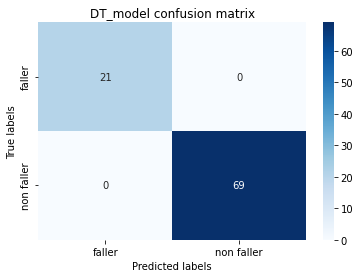

In [63]:
labels = ["faller", "non faller"]
DT_cm = (confusion_matrix(y_replaced_test, DT_prediction_replaced, labels=labels))
ax= plt.subplot()
sns.heatmap(DT_cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title("DT_model confusion matrix")

In [64]:
True_p = DT_cm[0][0]
True_n = DT_cm[1][1]
False_p = DT_cm[0][1]
False_n = DT_cm[1][0]

DT_accuracy = (True_p + True_n)/(True_p + True_n + False_p + False_n)
DT_sensitivity = (True_p)/(True_p + False_n)
DT_precision = (True_p)/(True_p + False_p)
DT_specificity = (True_n)/(True_n + False_p)

print("DT_accuracy: {}".format( round(DT_accuracy, 2)) + "\n" + 
"DT_sensitivity: {}".format( round(DT_sensitivity, 2))+ "\n" + 
"DT_precision: {}".format( round(DT_precision, 2)) + "\n" + 
"DT_specificity: {}".format( round(DT_specificity, 2)) )

DT_accuracy: 1.0
DT_sensitivity: 1.0
DT_precision: 1.0
DT_specificity: 1.0


Text(0.5, 1.0, 'Log_model confusion matrix')

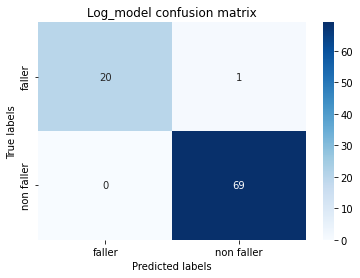

In [65]:
labels = ["faller", "non faller"]
Log_cm = (confusion_matrix(y_replaced_test, Log_prediction_replaced, labels=labels))
ax= plt.subplot()
sns.heatmap(Log_cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title("Log_model confusion matrix")

In [66]:
True_p = Log_cm[0][0]
True_n = Log_cm[1][1]
False_p = Log_cm[0][1]
False_n = Log_cm[1][0]

Log_accuracy = (True_p + True_n)/(True_p + True_n + False_p + False_n)
Log_sensitivity = (True_p)/(True_p + False_n)
Log_precision = (True_p)/(True_p + False_p)
Log_specificity = (True_n)/(True_n + False_p)

print("Log_accuracy: {}".format( round(Log_accuracy, 2)) + "\n" + 
"Log_sensitivity: {}".format( round(Log_sensitivity, 2))+ "\n" + 
"Log_precision: {}".format( round(Log_precision, 2)) + "\n" + 
"Log_specificity: {}".format( round(Log_specificity, 2)) )

Log_accuracy: 0.99
Log_sensitivity: 1.0
Log_precision: 0.95
Log_specificity: 0.99


Text(0.5, 1.0, 'RF_model confusion matrix')

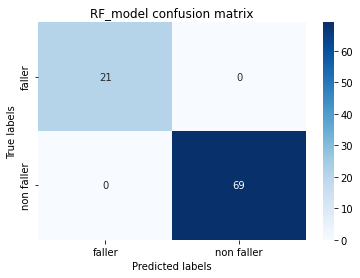

In [67]:
labels = ["faller", "non faller"]
RF_cm = (confusion_matrix(y_replaced_test, RF_prediction_replaced, labels=labels))
ax= plt.subplot()
sns.heatmap(RF_cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title("RF_model confusion matrix")

In [68]:
True_p = RF_cm[0][0]
True_n = RF_cm[1][1]
False_p = RF_cm[0][1]
False_n = RF_cm[1][0]

RF_accuracy = (True_p + True_n)/(True_p + True_n + False_p + False_n)
RF_sensitivity = (True_p)/(True_p + False_n)
RF_precision = (True_p)/(True_p + False_p)
RF_specificity = (True_n)/(True_n + False_p)

print("RF_accuracy: {}".format( round(RF_accuracy, 2)) + "\n" + 
"RF_sensitivity: {}".format( round(RF_sensitivity, 2))+ "\n" + 
"RF_precision: {}".format( round(RF_precision, 2)) + "\n" + 
"RF_specificity: {}".format( round(RF_specificity, 2)) )

RF_accuracy: 1.0
RF_sensitivity: 1.0
RF_precision: 1.0
RF_specificity: 1.0
